<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-Overview" data-toc-modified-id="Data-Overview-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data Overview</a></span></li><li><span><a href="#Dimensionality-reduction" data-toc-modified-id="Dimensionality-reduction-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Dimensionality reduction</a></span><ul class="toc-item"><li><span><a href="#Dimensionality-reduction-using-PCA" data-toc-modified-id="Dimensionality-reduction-using-PCA-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Dimensionality reduction using PCA</a></span></li><li><span><a href="#Dimensionality-reduction-using-t-SNE" data-toc-modified-id="Dimensionality-reduction-using-t-SNE-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Dimensionality reduction using t-SNE</a></span></li><li><span><a href="#PCA-&amp;-t-SNE" data-toc-modified-id="PCA-&amp;-t-SNE-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>PCA &amp; t-SNE</a></span></li></ul></li></ul></div>

In [85]:
from __future__ import print_function, division
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [86]:
test_df = pd.read_csv("fashion-mnist_test.csv")
train_df = pd.read_csv("fashion-mnist_train.csv")

# Data Overview
Fashion MNIST is an MNIST like dataset using images of clothing instead of hand-written digits. Each photo is 28x28 grayscale, with 10 different classes. &ensp; The dataset contains 70000 images with 60000 for training and 10000 for testing.

In [87]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [88]:
labels = { 0: 'T-shirt/top', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat', 
          5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8 : 'Bag', 9 : 'Ankle boot'}

In [89]:
# split the training and testing data into X (image) and Y (label) arrays

train_data = np.array(train_df, dtype='float32')
test_data = np.array(test_df, dtype='float32')

x_train = train_data[:, 1:] / 255
y_train = train_data[:, 0]

x_test = test_data[:, 1:] / 255
y_test = test_data[:, 0]

In [90]:
print ("X Train",x_train.shape)
print ("X Test",x_test.shape)

print ("Y Train",y_train.shape)
print ("Y Test",y_test.shape)

# The variable y_train contains the labels of every sample marked as integers from 0 to 9.

X Train (60000, 784)
X Test (10000, 784)
Y Train (60000,)
Y Test (10000,)


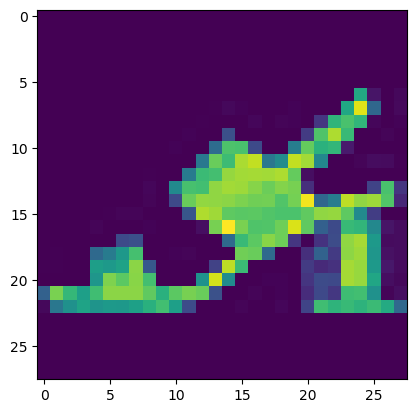

In [91]:
# lets see what a random image look like 

image = x_train[50, :].reshape((28, 28))

plt.imshow(image)
plt.show()

# Dimensionality reduction
## Dimensionality reduction using PCA
PCA is a technique which helps us in extracting a new set of variables from an existing large set of variables. <br/>       These newly extracted variables are called Principal Components. 

In [153]:
# we will only sample the first 20,000 so as to not burden the computer
# y_subset 0-9
# x_subset 0 - 783
x_subset = x_train[0:5000]
y_subset = y_train[0:5000]


In [154]:
from sklearn.decomposition import PCA
# making a new DataFrame "pca_df" 
# and checking the amount of variance of the data explained by these three components.

#pca_df = pd.DataFrame(columns = ['pca1','pca2','pca3'])

pca = PCA(n_components=3)
pca_result = pca.fit_transform(x_subset)

#pca_df['pca-one'] = pca_result[:,0]
#pca_df['pca-two'] = pca_result[:,1] 
#pca_df['pca-three'] = pca_result[:,2]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.28911495 0.17643677 0.06015452]


<IPython.core.display.Javascript object>


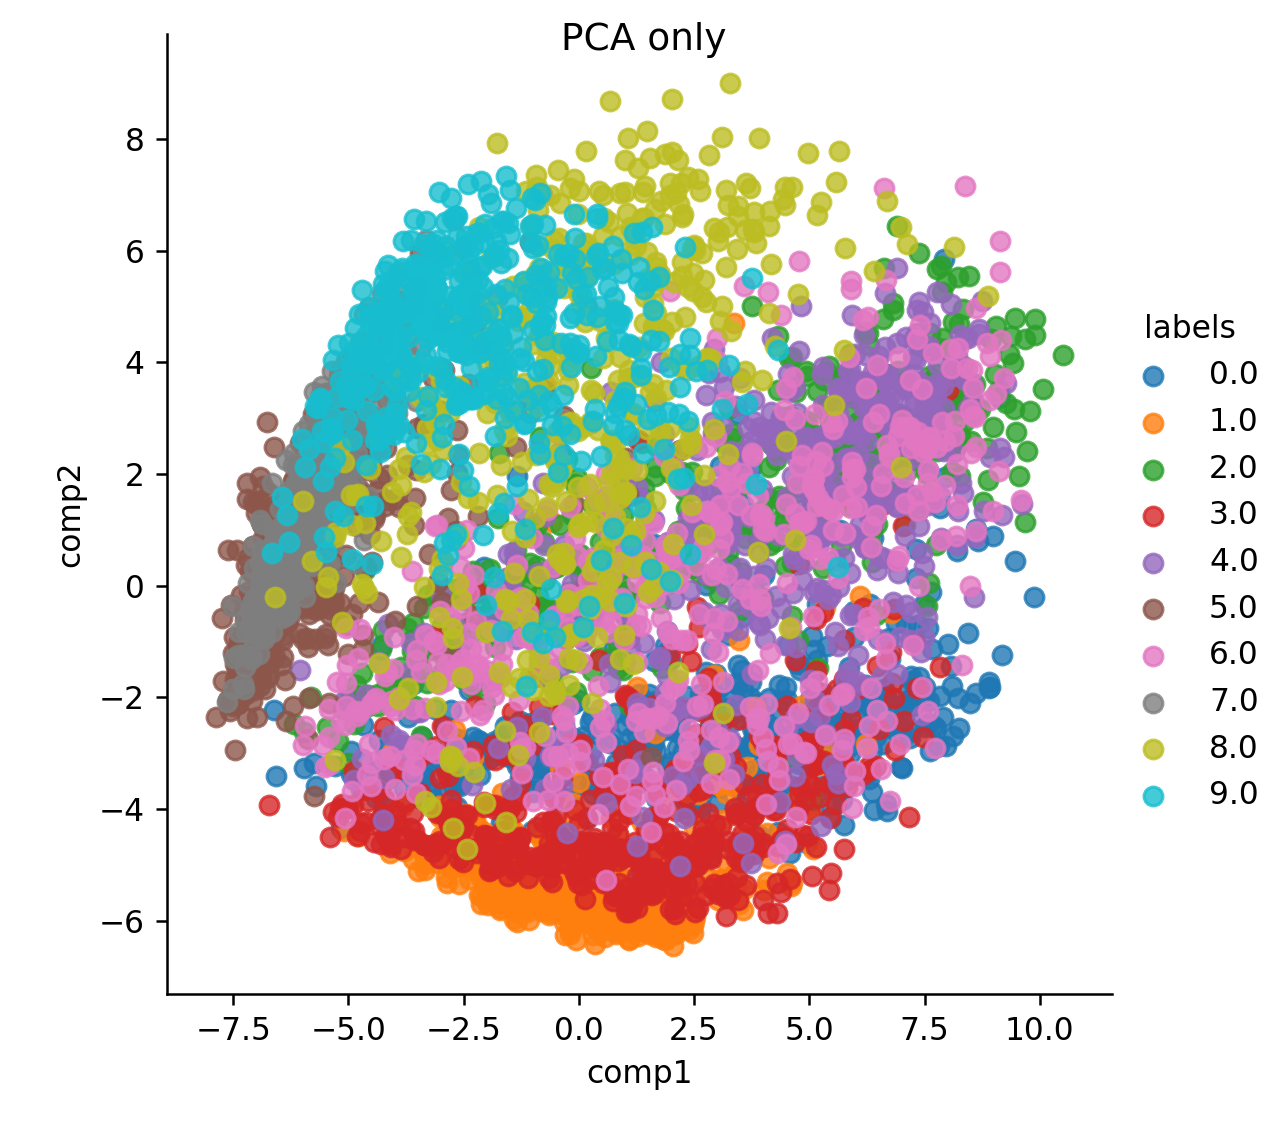

Text(0.5, 0.98, 'PCA only')

In [155]:
# PCA clustring plot
Xdf1 = pd.DataFrame(pca_result)
Xdf1.columns = ['comp1','comp2','comp3']
Xdf1['labels'] = y_subset

lm = sns.lmplot('comp1','comp2',hue='labels',data=Xdf1,fit_reg=False)

# Adding a title to the Figure
fig = lm.fig 
fig.suptitle("PCA only", fontsize=12)

<IPython.core.display.Javascript object>


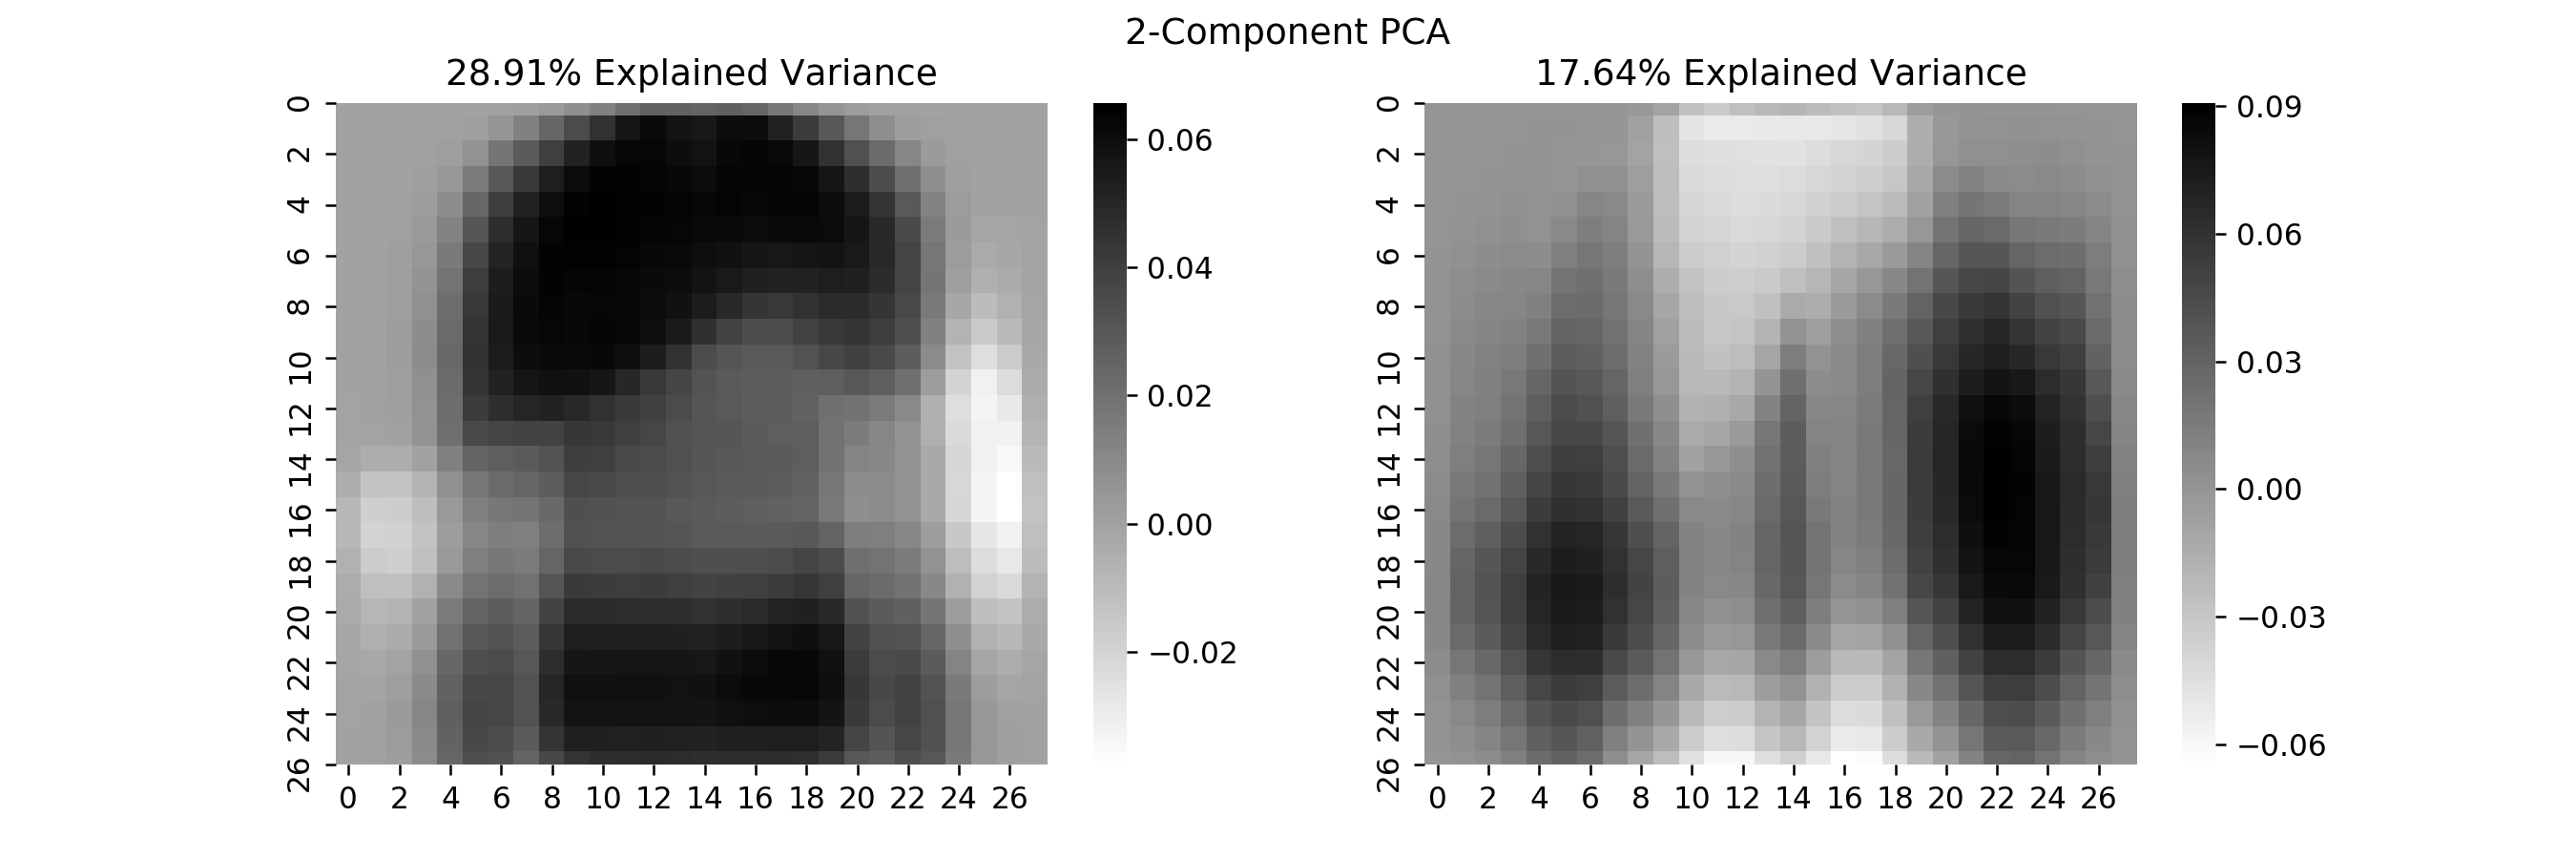

Text(0.5, 0.98, '2-Component PCA')

In [156]:
plt.style.use('default')

fig, axarr = plt.subplots(1, 2, figsize=(12, 4))

sns.heatmap(pca.components_[0, :].reshape(28, 28), ax=axarr[0], cmap='gray_r')
sns.heatmap(pca.components_[1, :].reshape(28, 28), ax=axarr[1], cmap='gray_r')
axarr[0].set_title(
    "{0:.2f}% Explained Variance".format(pca.explained_variance_ratio_[0]*100),
    fontsize=12
)
axarr[1].set_title(
    "{0:.2f}% Explained Variance".format(pca.explained_variance_ratio_[1]*100),
    fontsize=12
)
axarr[0].set_aspect('equal')
axarr[1].set_aspect('equal')

plt.suptitle('2-Component PCA')

<IPython.core.display.Javascript object>


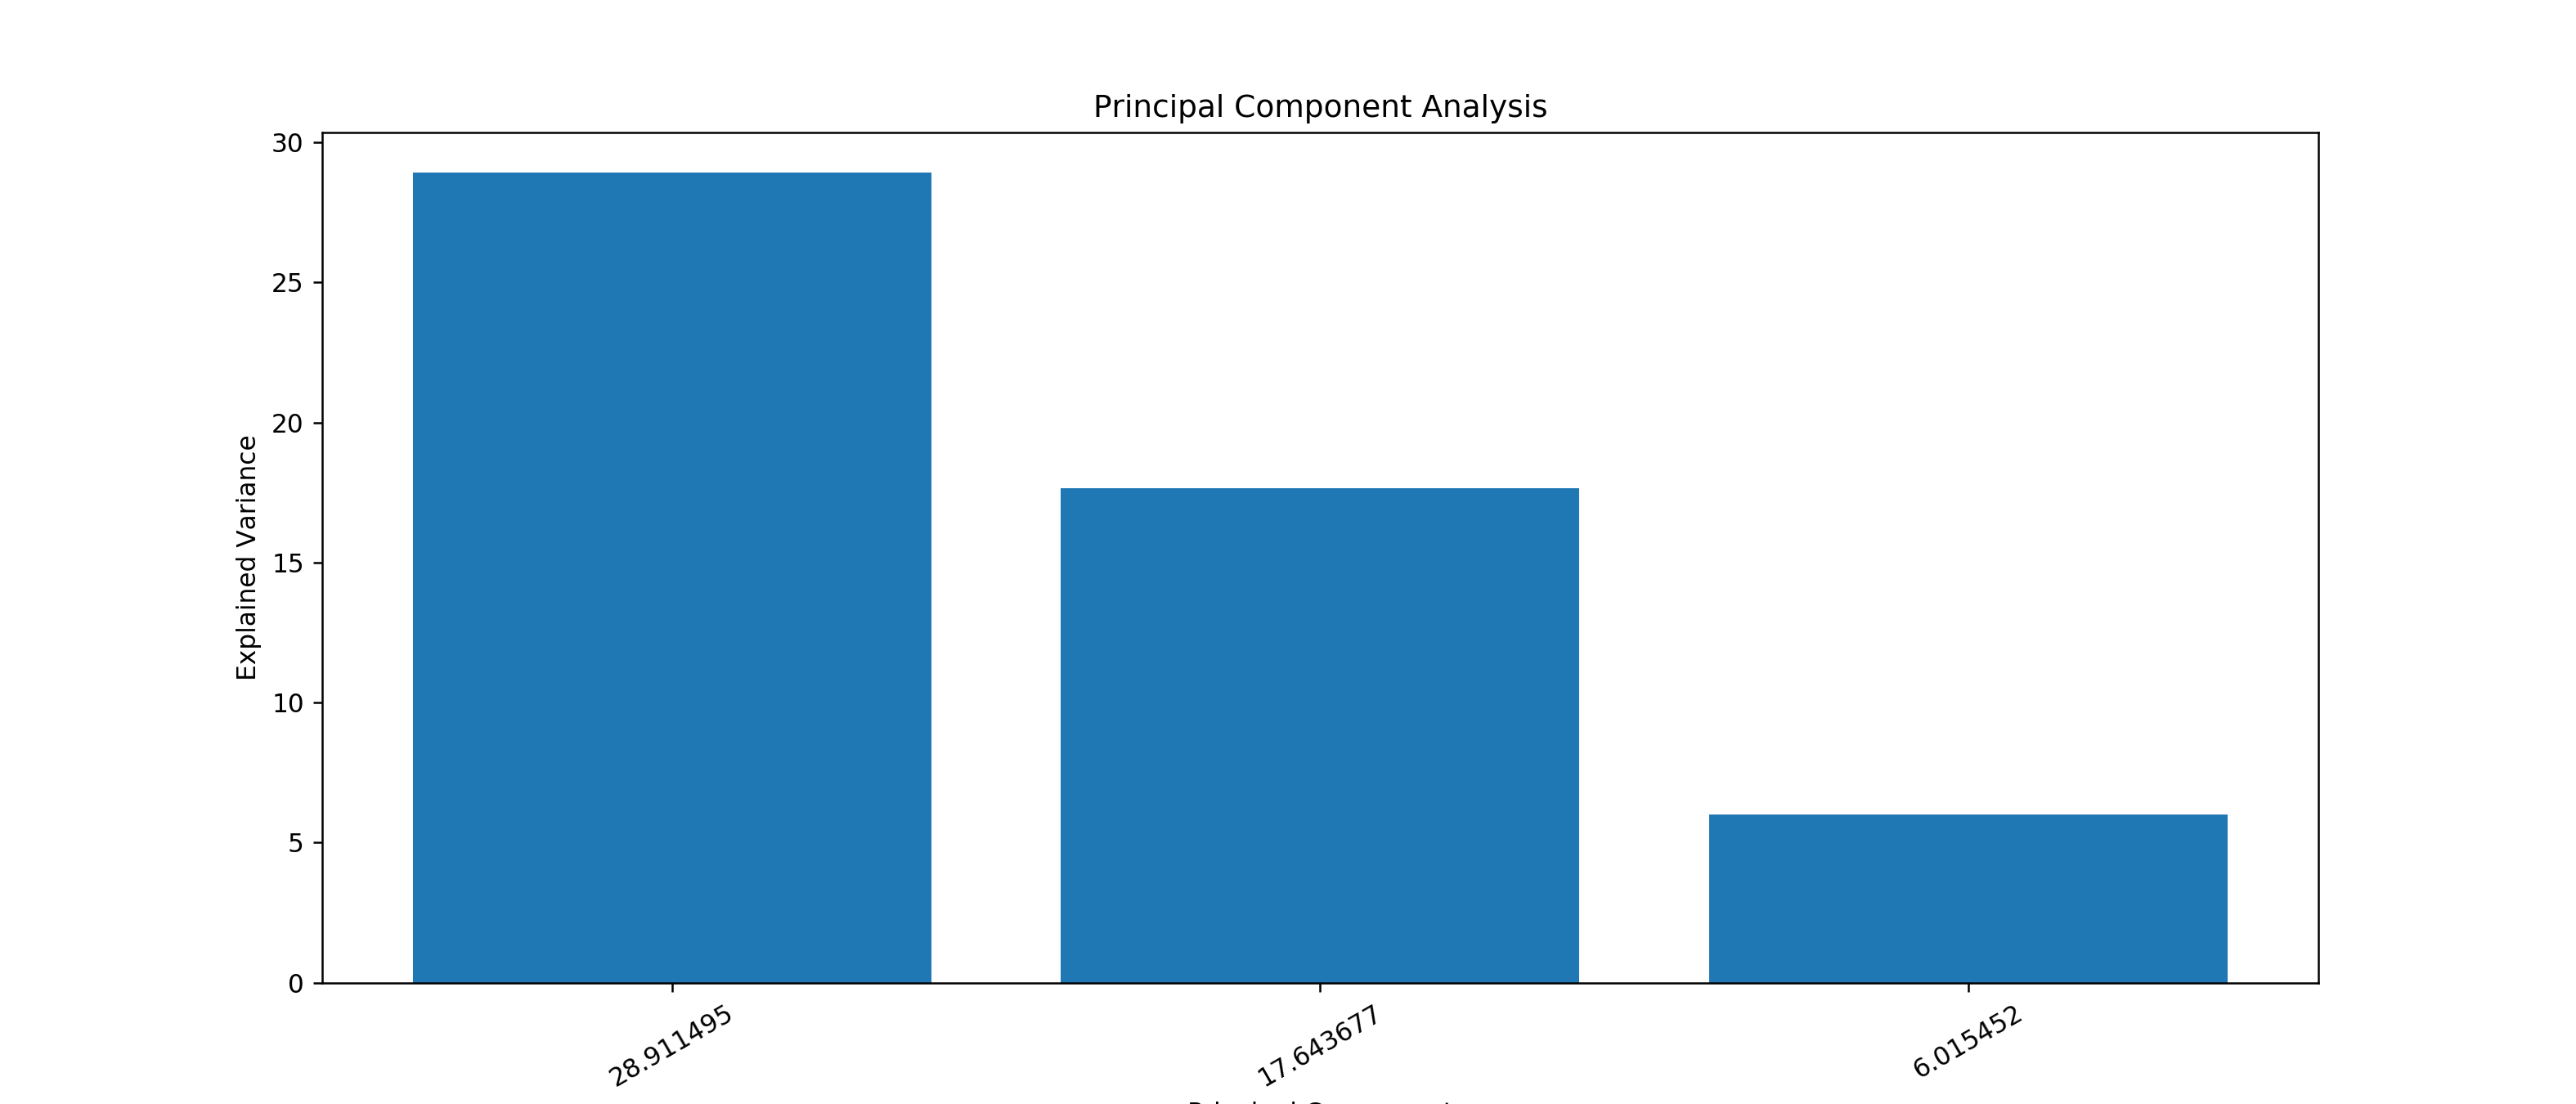

In [157]:
index = np.arange(len(pca.explained_variance_ratio_))
plt.figure(figsize=(14,6))
plt.title('Principal Component Analysis')
plt.bar(index, pca.explained_variance_ratio_*100)
plt.xlabel('Principal Component', fontsize=10)
plt.ylabel('Explained Variance', fontsize=10)
plt.xticks(index, pca.explained_variance_ratio_*100, fontsize=10, rotation=30)
plt.show()

## Dimensionality reduction using t-SNE
t - Distributed Stochastic Neighbor Embedding (t-SNE) <br/>

algoritem explanation: <br/>
The t-SNE algorithm calculates a similarity measure between pairs of instances in the high dimensional space and in the low dimensional space.<br/>
It then tries to optimize these two similarity measures using a cost function. <br/>

well see how good the T-SNE weill do compared to the PCA model 

In [158]:
from sklearn.manifold import TSNE
# we will only sample the first 20,000 so as to not burden the computer

# there is sometimes a difrent plot maybe using the smame x_subset

In [159]:
# t-sne alone 

tsne = TSNE(n_components=2,n_iter=1000)
tsne_alone = tsne.fit_transform(x_subset)

<IPython.core.display.Javascript object>


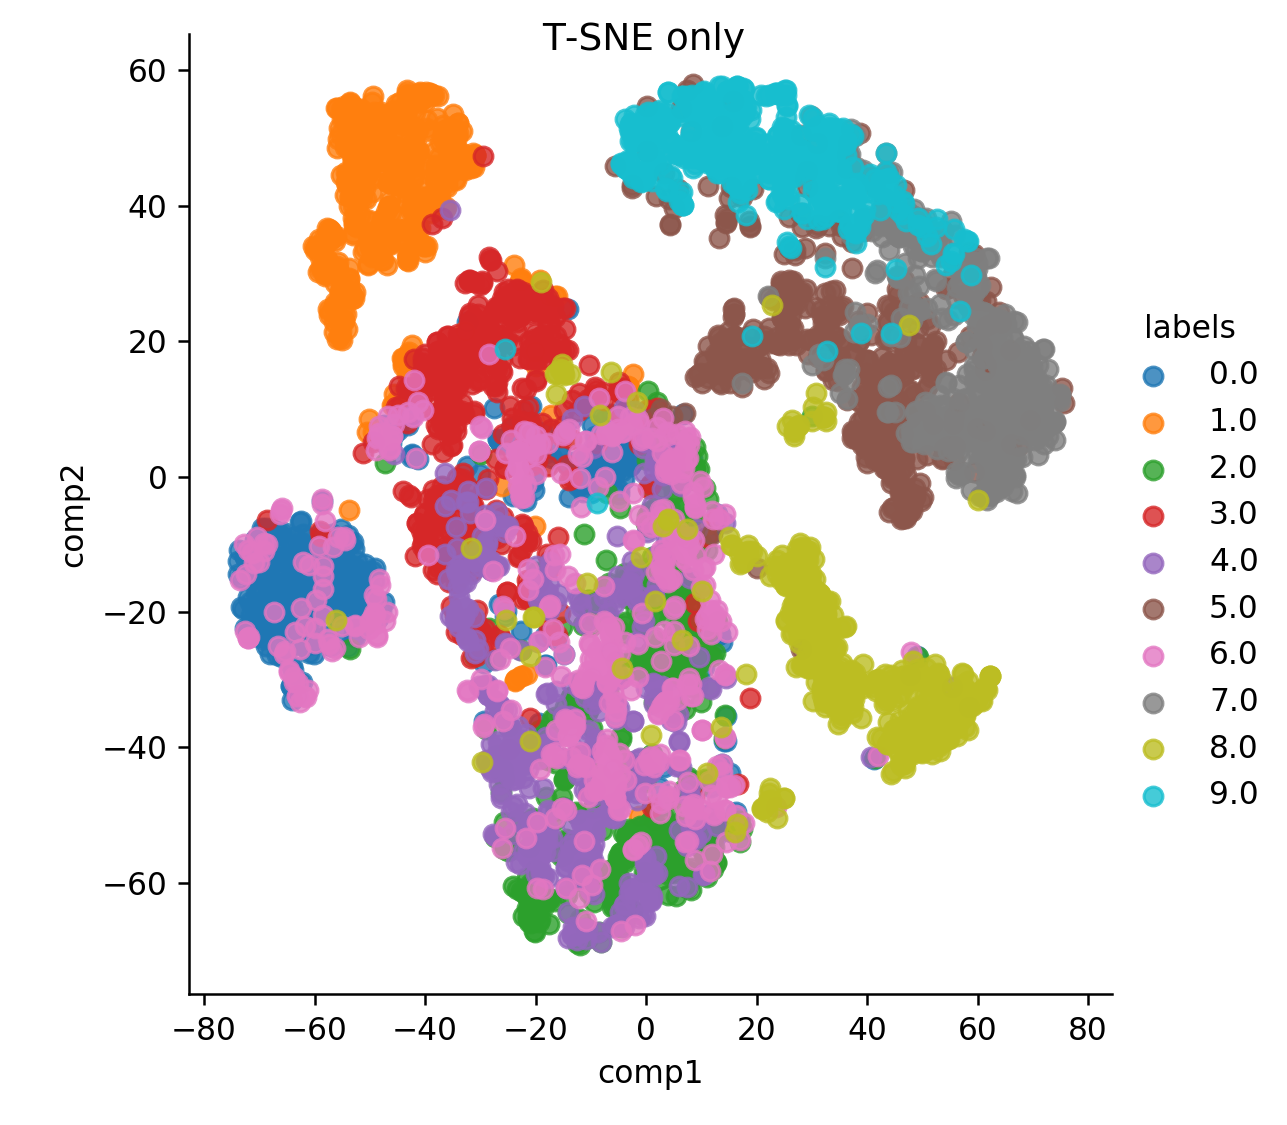

Text(0.5, 0.98, 'T-SNE only')

In [160]:
#Create a data frame
Xdf = pd.DataFrame(tsne_alone)
Xdf.columns = ['comp1','comp2']
Xdf['labels'] = y_subset
tsneplot = sns.lmplot('comp1','comp2',hue='labels',data=Xdf,fit_reg=False)

fig = tsneplot.fig 
fig.suptitle("T-SNE only", fontsize=12)

## PCA & t-SNE
Scikit-learn's documentation of t-SNE explicitly states that:

It is highly recommended to use another dimensionality reduction method (e.g., PCA for dense data or TruncatedSVD for sparse data) to reduce the number of dimensions to a reasonable amount (e.g., 50) if the number of features is very high. This will suppress some noise and speed up the computation of pairwise distances between samples.

In [161]:
#PCA AND T-SNE

pca_50 = PCA(n_components=50)
pca_result_50 = pca_50.fit_transform(x_subset)
print('Cumulative explained variation for 50 principal components: {}'.format(np.sum(pca_50.explained_variance_ratio_)))
print('pca_result_50 shape:',pca_result_50.shape)

Cumulative explained variation for 50 principal components: 0.8636001944541931
pca_result_50 shape: (5000, 50)


In [162]:
tsne = TSNE(n_components=3,n_iter=1000,random_state=6)
pca_tsne_result = tsne.fit_transform(pca_result_50)

<IPython.core.display.Javascript object>


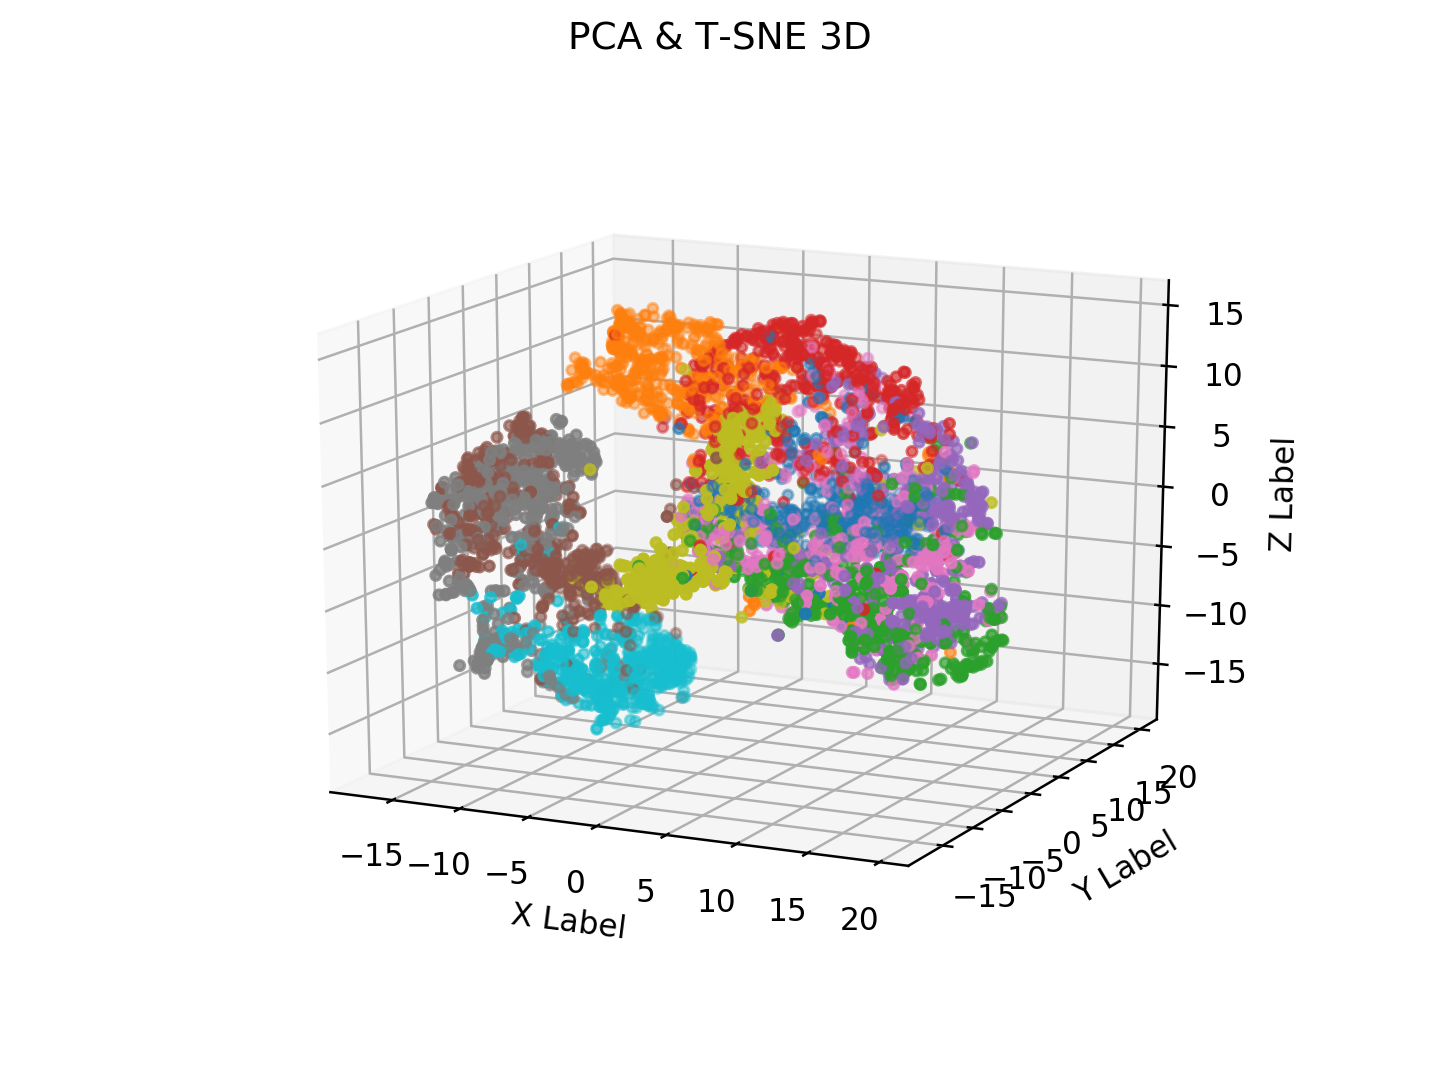

In [163]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib notebook

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_tsne_result[:, 0], pca_tsne_result[:, 1], pca_tsne_result[:, 2], c=y_subset, s=10, cmap="tab10")

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

fig.suptitle("PCA & T-SNE 3D", fontsize=12)
plt.show()

<IPython.core.display.Javascript object>


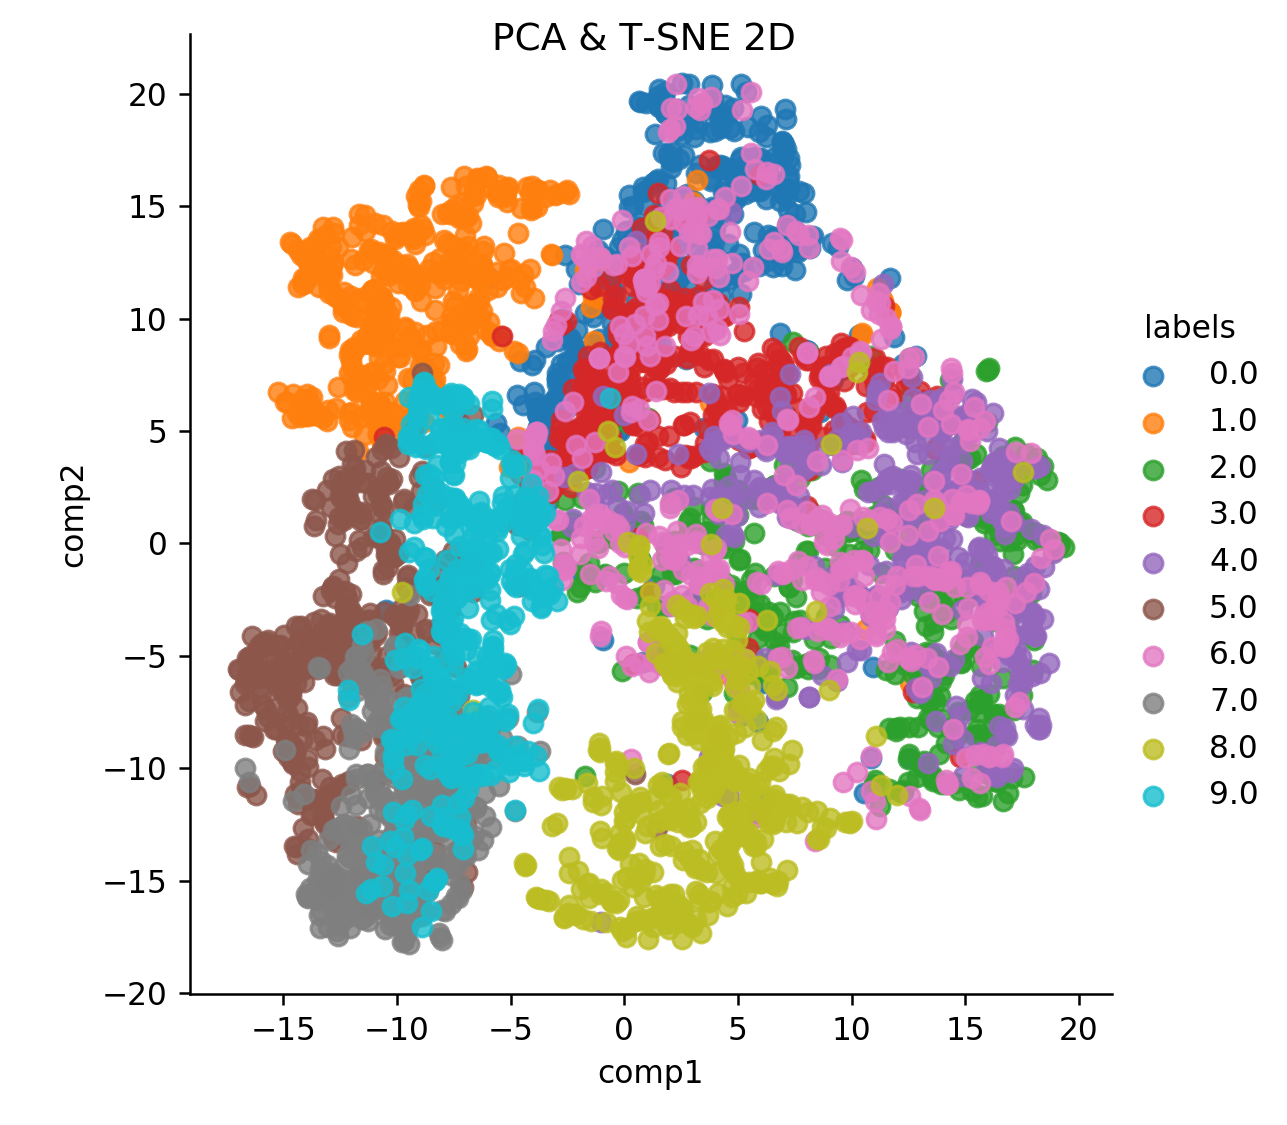

Text(0.5, 0.98, 'PCA & T-SNE 2D')

In [164]:
#Create a data frame for PCA & t-SNE
Xdf = pd.DataFrame(pca_tsne_result)
Xdf.columns = ['comp1','comp2','comp3']
Xdf['labels'] = y_subset
pca_tsne_plot = sns.lmplot('comp1','comp2',hue='labels',data=Xdf,fit_reg=False)

fig = pca_tsne_plot.fig 
fig.suptitle("PCA & T-SNE 2D", fontsize=12)